<a href="https://colab.research.google.com/github/jeyasris2/Cmpe258_HomeWork0/blob/master/MLProject_homework0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

pulsar_stars.csv  sample_data


In [0]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [6]:
data = pd.read_csv('pulsar_stars.csv', low_memory= True,  encoding='ISO-8859–1')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
Standard deviation of the integrated profile,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
Excess kurtosis of the integrated profile,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Skewness of the integrated profile,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
Mean of the DM-SNR curve,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392140
Standard deviation of the DM-SNR curve,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
Excess kurtosis of the DM-SNR curve,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
Skewness of the DM-SNR curve,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309331,1191.000837
target_class,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


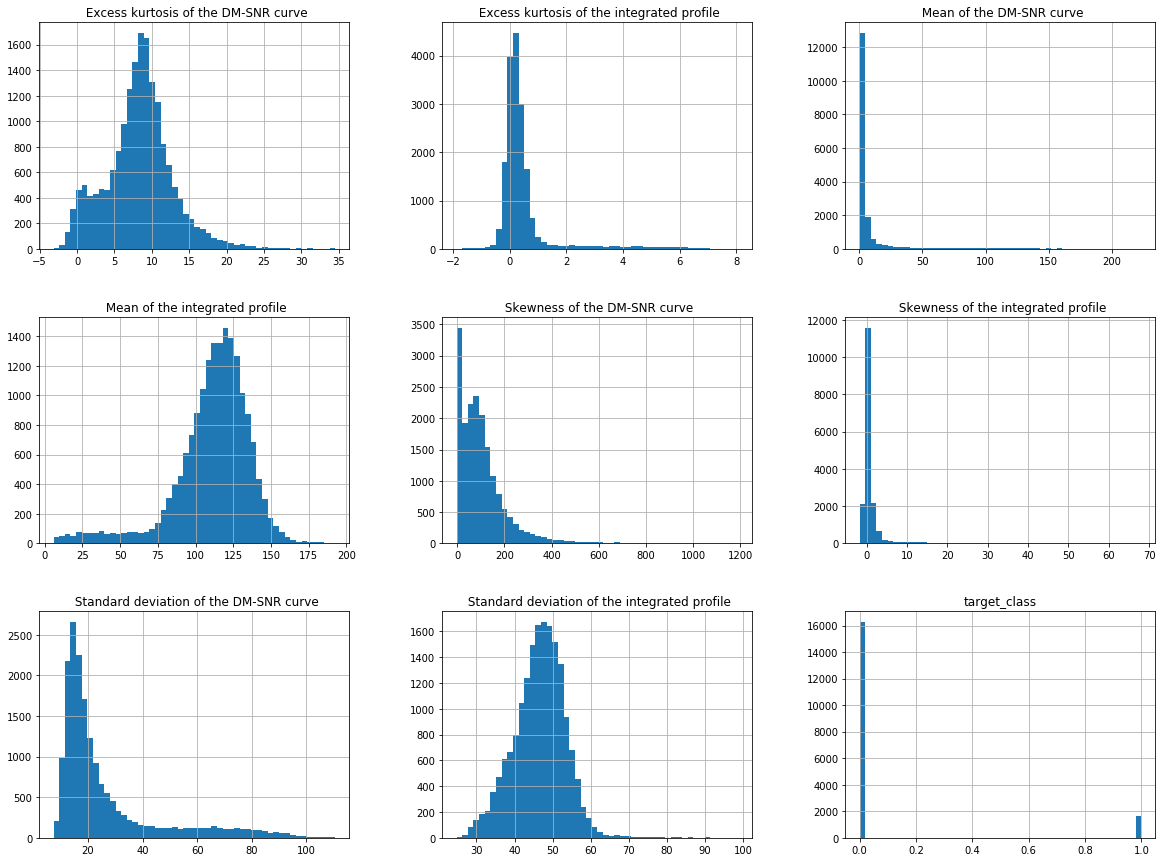

In [8]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

In [0]:
np.random.seed(42)

In [11]:
x_test.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
15985,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405
8188,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791
8157,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134942
2589,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904
11909,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268


In [19]:
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class


In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


In [13]:
imputer.fit(data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [14]:
imputer.statistics_

array([115.078125  ,  46.94747911,   0.22324002,   0.1987104 ,
         2.80183947,  18.46131559,   8.43351469,  83.06455613,
         0.        ])

In [15]:
data.median().values

array([115.078125  ,  46.94747911,   0.22324002,   0.1987104 ,
         2.80183947,  18.46131559,   8.43351469,  83.06455613,
         0.        ])

In [0]:
X = imputer.transform(data)

In [0]:
data_tr = pd.DataFrame(X, columns=data.columns,
                          index=data.index)

In [0]:
from sklearn.model_selection import train_test_split
Y = data['target_class']
X = data.drop('target_class', axis =1)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lin_reg.predict(x_test)

array([-0.02370586,  0.02251407,  0.07538866, ...,  0.03205425,
        0.0772189 ,  0.00978247])

In [31]:
score = lin_reg.score(x_test, y_test)
print(score)

0.670410571031768


In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [34]:
from sklearn.metrics import mean_squared_error

y_predictions = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, y_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.1776632933671327